In [28]:
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.dates as mdates
from prophet import Prophet
from datetime import datetime
from pandas import DataFrame
import math
import scipy as sp
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [29]:
df_2020 = pd.read_csv('../Data/dallas_solar_energy_2020.csv',index_col=False)
df_2019 = pd.read_csv('../Data/dallas_solar_energy_2019.csv',index_col=False)
df_solar_raw = df_2019.append(df_2020, ignore_index=True)

In [30]:
df_solar_raw.to_csv('solar_2019_2020.csv',index=False)

In [40]:
df_solar = df_solar_raw[['timestamp_solar','ghi']]
df_solar['Datetime'] = df_solar['timestamp_solar'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_solar= df_solar.drop(['timestamp_solar'],axis=1)
df_solar['Datetime'] = pd.to_datetime(df_solar['Datetime'])
df_solar = df_solar.set_index('Datetime')
df_solar.sort_index(inplace = True)

In [39]:
df_solar.head(50)

,ghi
Datetime,
2019-01-01 00:00:00,0.0
2019-01-01 00:30:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 01:30:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 02:30:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 03:30:00,0.0
2019-01-01 04:00:00,0.0


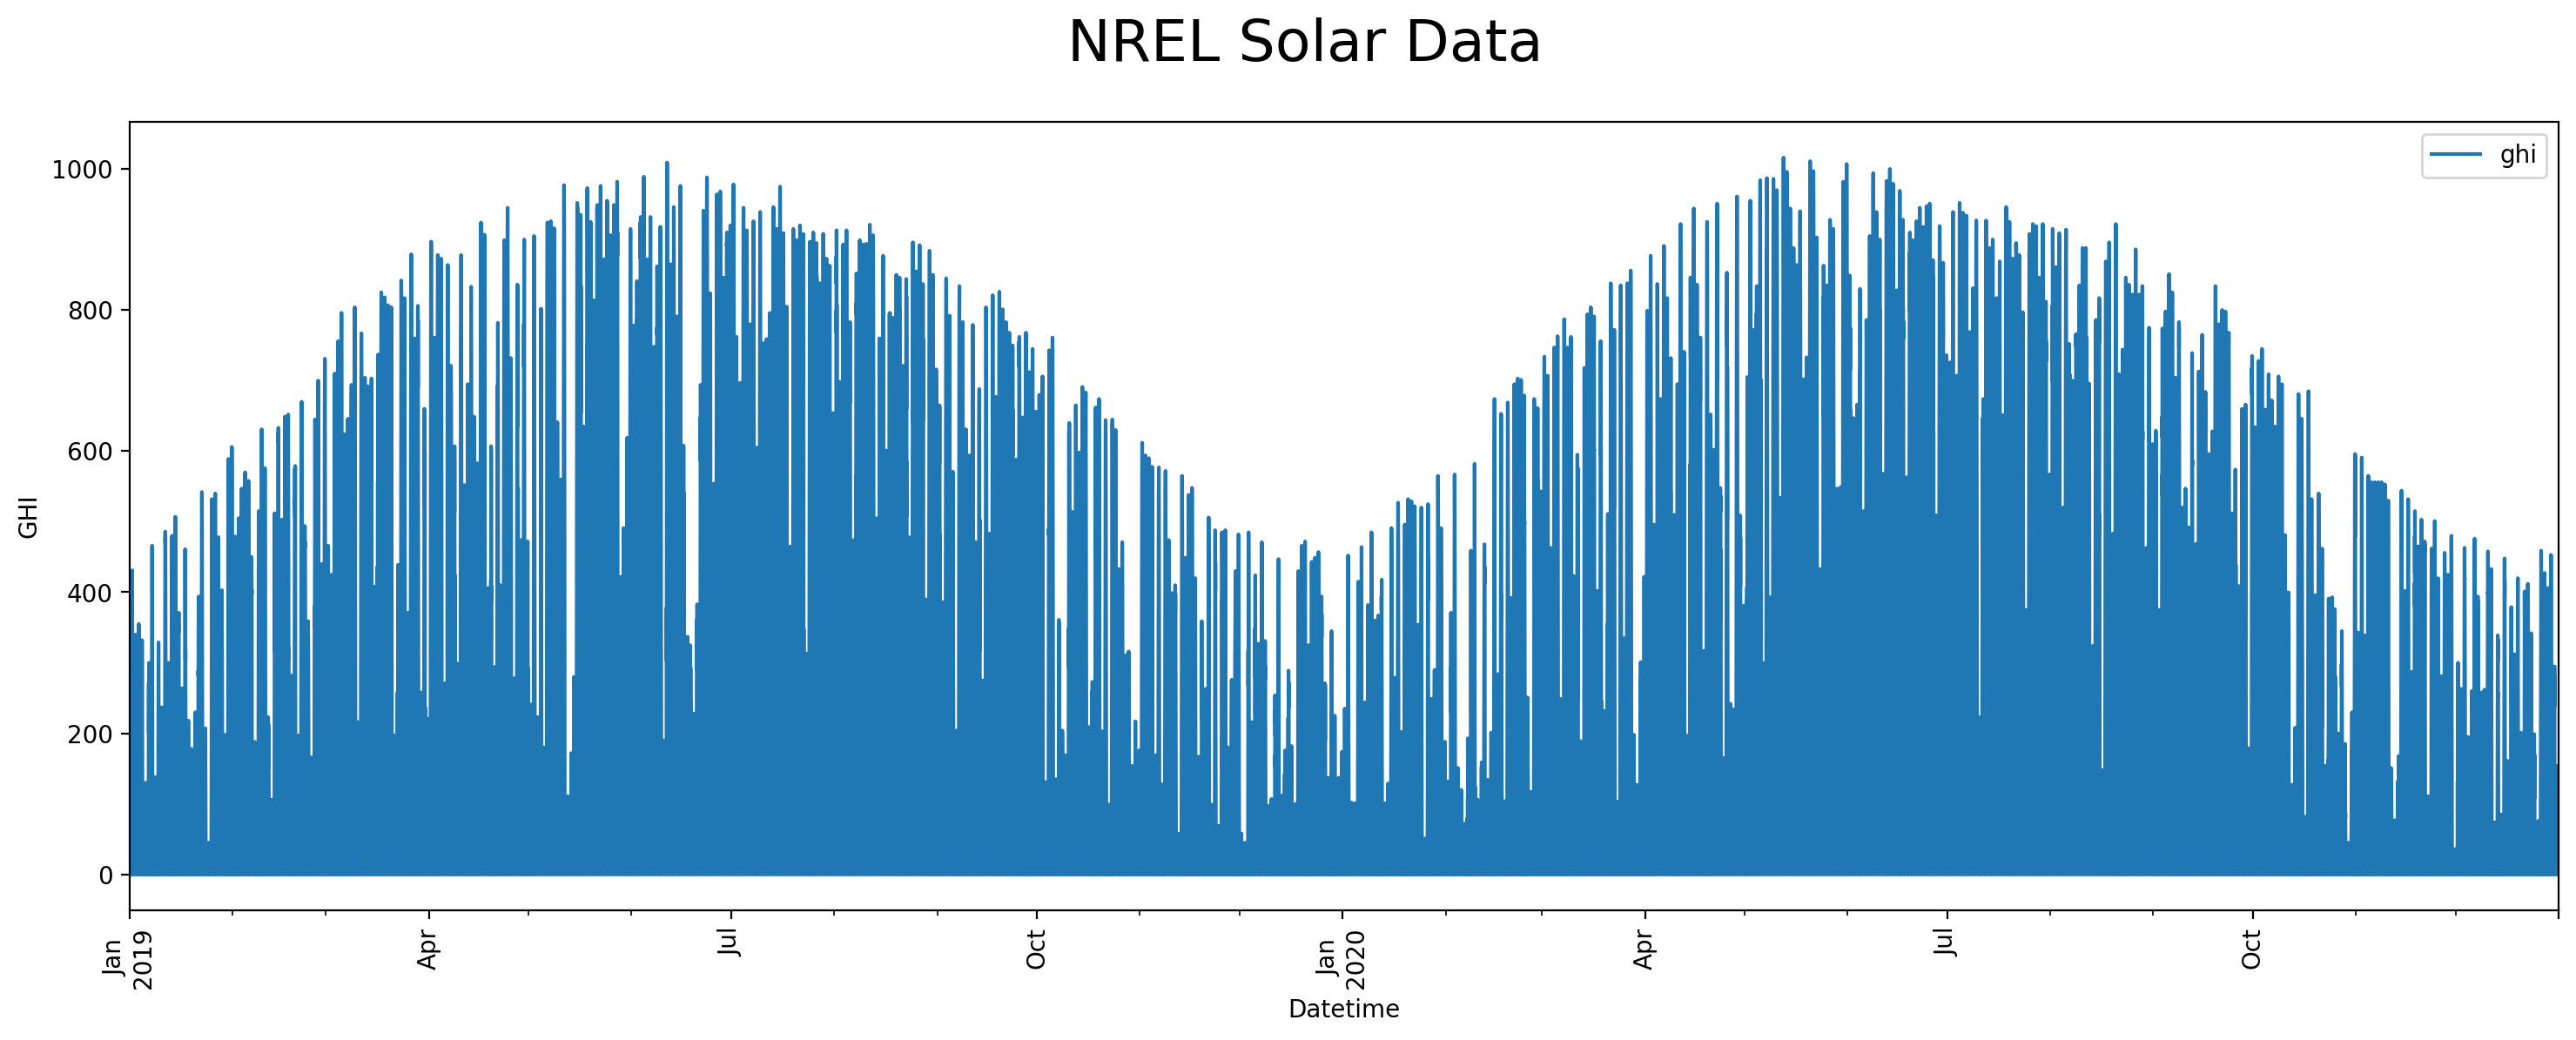

In [41]:
#visual checking of data. Plotting by Pandas method, drawing axes by Matplotlib
f, ax = plt.subplots(figsize=(18,6),dpi=200);
plt.suptitle('NREL Solar Data', fontsize=24);
df_solar.plot(ax=ax,rot=90,ylabel='GHI');

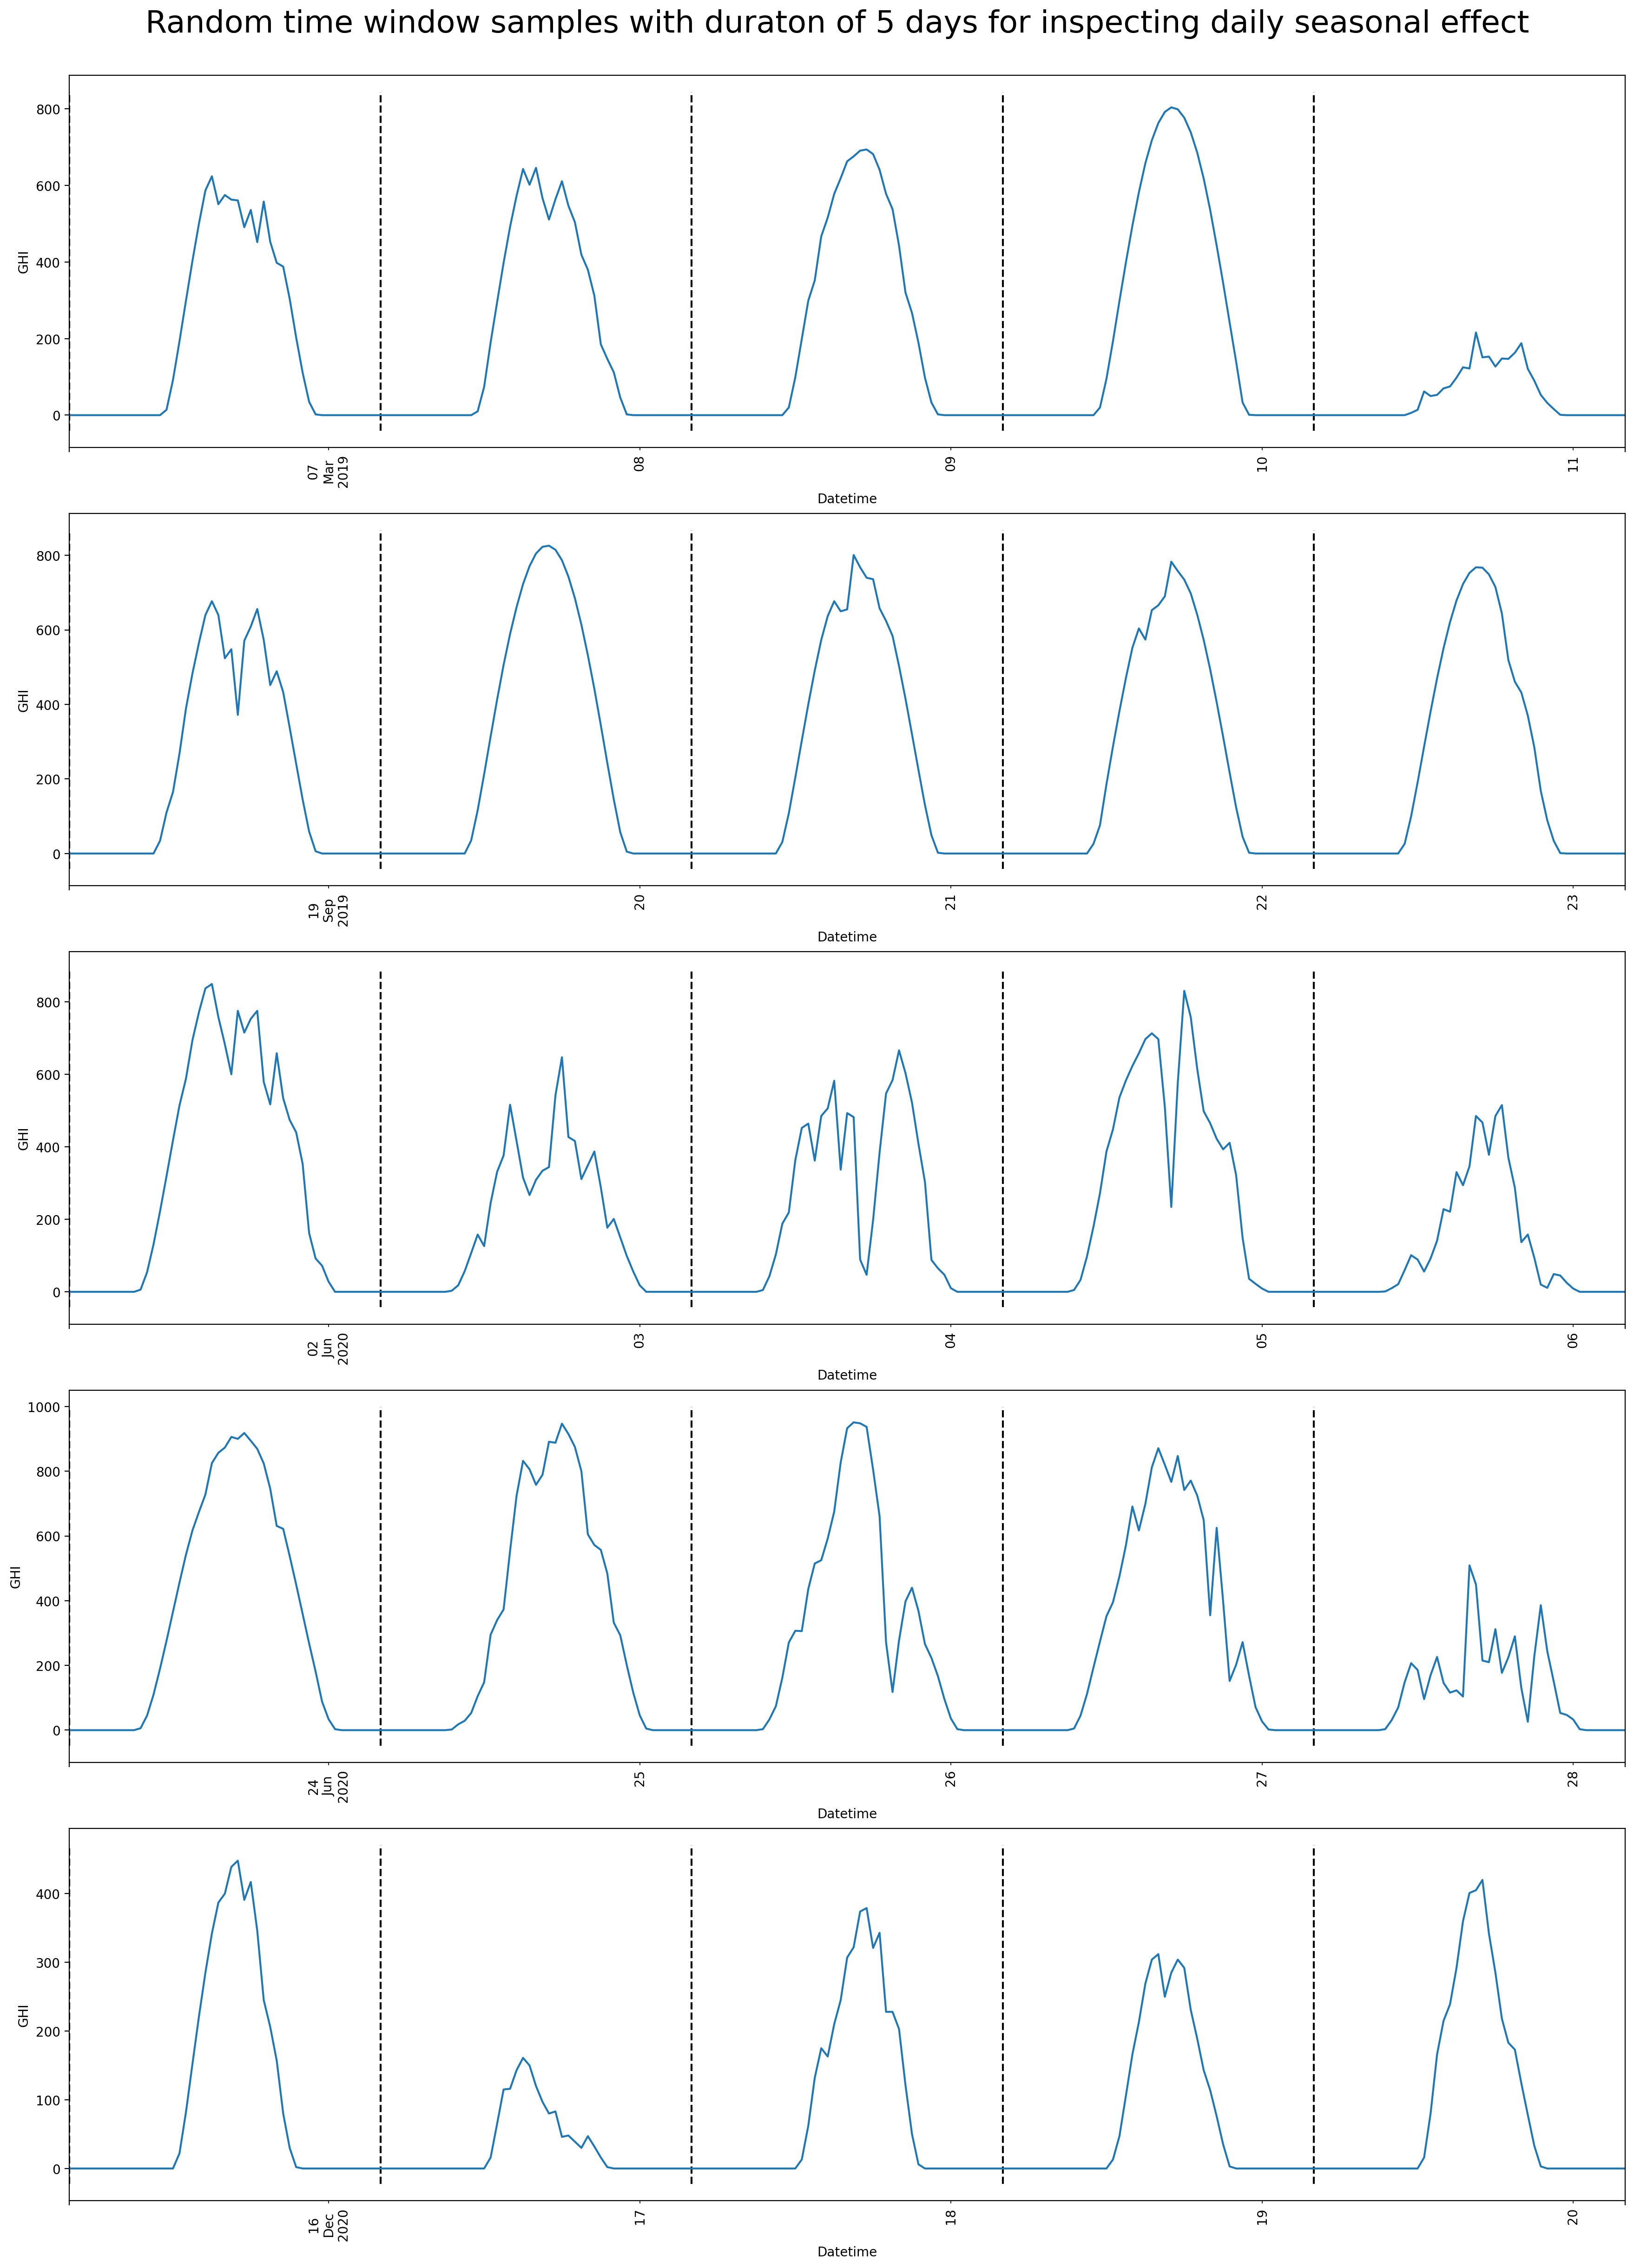

In [47]:
#drawing a random sample of 5 indices without repetition from sub sample, where current time is 04:00
sample = sorted([x for x in np.random.choice([x for x in df_solar.index[:-241] if x.hour == 4],5,replace=False)])

#checking persistence of daily seasonality by inspecting 5 random time window of 10 days
f, axes = plt.subplots(len(sample),1,dpi=200,figsize=(18,24));
f.tight_layout(pad=3.0)
plt.suptitle('Random time window samples with duraton of 5 days for inspecting daily seasonal effect', y = 1.01, fontsize=24)

#plotting time windows and drawing vertical lines at 04:00 each day
for si,s in enumerate(sample):
    ids = df_solar.index.to_list().index(s)
    idx = [df_solar.iloc[x:x+1,:].index.values for x in range(ids, ids + 240,48)]
    df_solar.iloc[ids:(ids+241),:].plot(ax=axes[si], legend=False, rot=90, ylabel='GHI');
    axes[si].vlines(idx, axes[si].get_ylim()[0], axes[si].get_ylim()[1], colors='black', linestyles='dashed')